In [6]:
import sys, os
sys.path.append(os.path.dirname(os.getcwd())) # Include ../SSD in path
import tops
import matplotlib.pyplot as plt
import pathlib
from ssd.utils import load_config

In [7]:
cfg = load_config("../configs/ssd300.py")
logs = tops.logger.read_logs(pathlib.Path("../outputs/ssd300"))

Saving SSD outputs to: outputs/


In [8]:
# The log is formatted as a list of dictionaries
print(logs[:10])

[{'loss/regression_loss': 2.8897366523742676, 'loss/classification_loss': 9.692766189575195, 'loss/total_loss': 12.582502365112305, 'global_step': 0}, {'stats/learning_rate': 0.000518, 'global_step': 1}, {'stats/learning_rate': 0.000527, 'global_step': 2}, {'stats/learning_rate': 0.000536, 'global_step': 3}, {'stats/learning_rate': 0.000545, 'global_step': 4}, {'stats/learning_rate': 0.000554, 'global_step': 5}, {'stats/learning_rate': 0.000563, 'global_step': 6}, {'stats/learning_rate': 0.0005719999999999999, 'global_step': 7}, {'stats/learning_rate': 0.000581, 'global_step': 8}, {'stats/learning_rate': 0.0005900000000000001, 'global_step': 9}]


In [10]:
# We are saving logs to disk every 10th iteration, thus we need to filter out all entries without a loss
loss_entries = [entry for entry in logs if "loss/regression_loss" in entry]

Text(0.5, 0, 'Global step (number of batches trained on)')

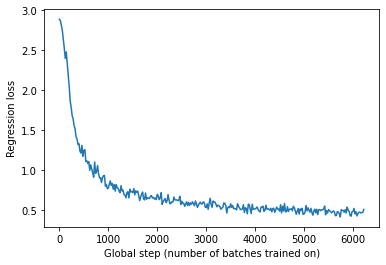

In [11]:
plt.plot([entry["global_step"] for entry in loss_entries], [entry["loss/regression_loss"] for entry in loss_entries])
plt.ylabel("Regression loss")
plt.xlabel("Global step (number of batches trained on)")